Analysis Summary

Summary Statistics - Capomulin and Ramicane have lower mean and median tumor volumes compared to other regimens, indicating that they are more effective than the other drugs in reducing tumor size.

Bar Chart (# of Observed Mouse Timepoints by Drug Regimen) - The bar chart shows that Capomulin and Ramicane have the highest number of observed timepoints which can be attributed to the effectiveness of these treatments where we have more data due to longer observation periods of the drugs compared to the others.

Pie Chart (gender distribution) - Shows a nearly even distribution of gender indicating that there is no bias in genders for drug effectiveness in play.

Boxplots (Tumor Volume Distribution by Treatment Group) - Bos plots of Capomulin, Ramicane, Infubinol, and Ceftamin shows that Capomulin and Ramicane have lower median tumor volumes compared to Infubinol and Ceftamin, suggesting that Capomulin and Ramicane might be more effective in controlling tumor growth. There are outliers in Infubinol group, indicating variability in this treatment.

Line graph (Capomulin Treatment of Mouse l509) - For the individual mouse treated with Capomulin, there is a general trend of decreasing tumor volume over time, indicating that Capomulin may be effective in reducing tumor size in this mouse and provides a sample of the population of the treatment group.

Scatterplot and Liner Regression (Mouse Weight vs. Average Observed Tumor Volume) - The linear regression model confirms the positive relationship between mouse weight and tumor volume. The slope of the regression line is positive, indicating that as mouse weight increases, the tumor volume also increases.

Correlation - here is a strong positive correlation (correlation coefficient of approximately 0.84) between mouse weight and average observed tumor volume for the Capomulin regimen. This suggests that heavier mice tend to have larger tumor volumes.

Overall the results suggest that Capomulin and Ramicane are the more effective drug regimens for reducing tumor growth with Capomulin showing a strong correlation between mouse weight and tumor volume. Further investigation and more data analysis with different tests and parameters would be necessary to confirm these findings and determine ith conclusive evidence.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID","Mouse ID"])

# ran this code to get file for reference during coding
#complete_data.to_excel("complete_data.xlsx", index=False)

# Display the data table for preview
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = complete_data["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Find the duplicate rows by Mouse ID and Timepoint
duplicates = complete_data[complete_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_ids = duplicates['Mouse ID'].unique()
duplicate_ids


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_data = complete_data[complete_data['Mouse ID'] == 'g989']
duplicate_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

duplicate_indices = complete_data.index[complete_data.isin(duplicate_data).all(axis=1)]
cleaned_data = complete_data.drop(index=duplicate_indices)

cleaned_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = cleaned_data["Mouse ID"].nunique()
mouse_count2

248

Summary statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#summary_statistics = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_mean = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_var = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_std = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({
    "Mean Tumor Volume": tumor_mean,
    "Median Tumor Volume": tumor_median,
    "Tumor Volume Variance": tumor_var,
    "Tumor Volume Std. Dev.": tumor_std,
    "Tumor Volume Std. Err.": tumor_sem})

summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_agg = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Bar and Pie Chart

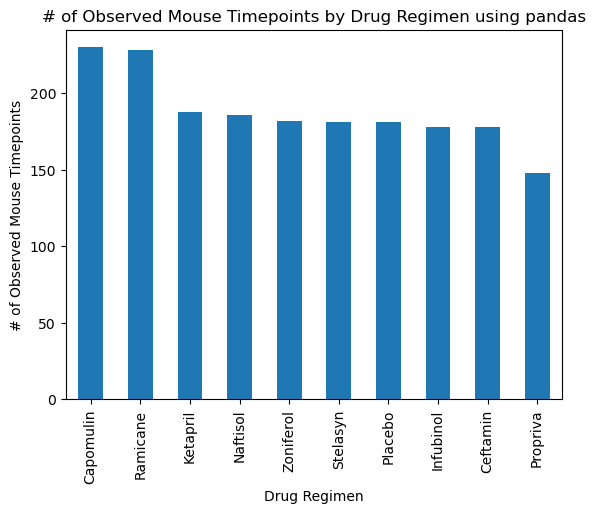

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_data["Drug Regimen"].value_counts()
regimen_counts
#there are 10 drug regimens

# Generate the bar plot using only Pandas
bar_plot = regimen_counts.plot(kind='bar')

# Set the labels and title using Pandas plot functionality
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("# of Observed Mouse Timepoints")
bar_plot.set_title("# of Observed Mouse Timepoints by Drug Regimen using pandas")

# Display the plot
plt.show()

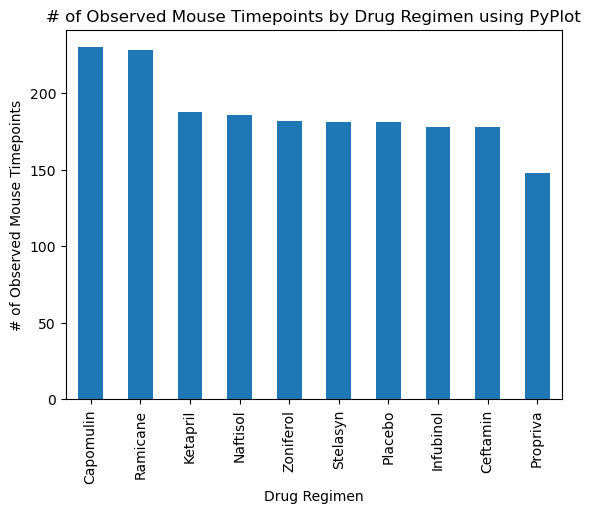

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

regimen_counts.plot(kind='bar')
plt.title("# of Observed Mouse Timepoints by Drug Regimen using PyPlot")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Show the plot
plt.show()


<Axes: title={'center': 'Percentage of Male and Female Mice using Pandas'}, ylabel='Sex'>

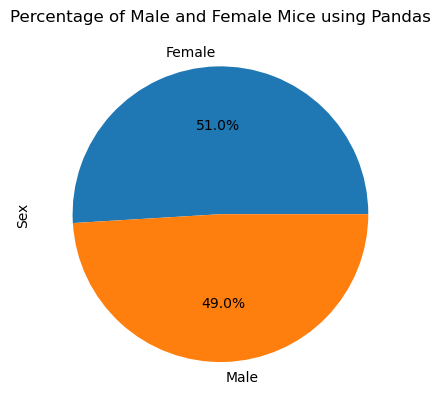

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Count the number of male and female mice
gender_counts = cleaned_data['Sex'].value_counts()

# Plot the pie chart
gender_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=0,
    labels=["Female", "Male"],
    legend=False,
    title="Percentage of Male and Female Mice using Pandas",
    ylabel="Sex"
)



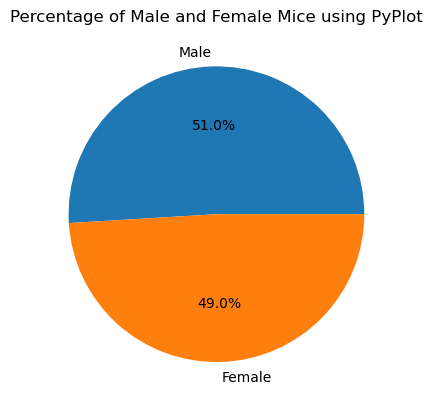

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Plot the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=0)
plt.title("Percentage of Male and Female Mice using PyPlot")
plt.show()


Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = cleaned_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoints, cleaned_data, on=["Mouse ID", "Timepoint"])


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = merged_df[merged_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    tumor_vol_data.append(treatment_data)
    # add subset 
    
    # Determine outliers using upper and lower bounds
    # Calculate quartiles
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Calculate upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{treatment} potential outliers: {outliers}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


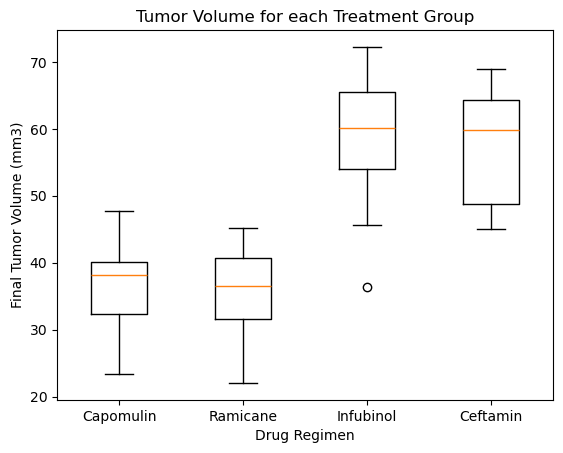

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments)
plt.title("Tumor Volume for each Treatment Group")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()



Line and Scatterplots

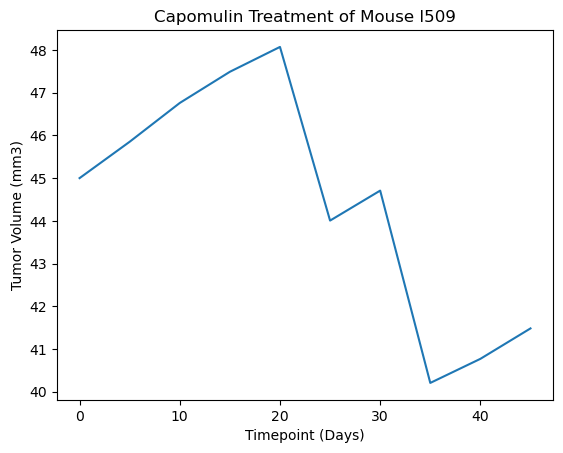

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Getting mouse like in example
unique_mouse = "l509"
unique_data = cleaned_data[(cleaned_data["Mouse ID"] == unique_mouse)]

# Plotting line graph
plt.plot(unique_data["Timepoint"], unique_data["Tumor Volume (mm3)"], linestyle='-')
plt.title(f'Capomulin Treatment of Mouse {unique_mouse}')
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

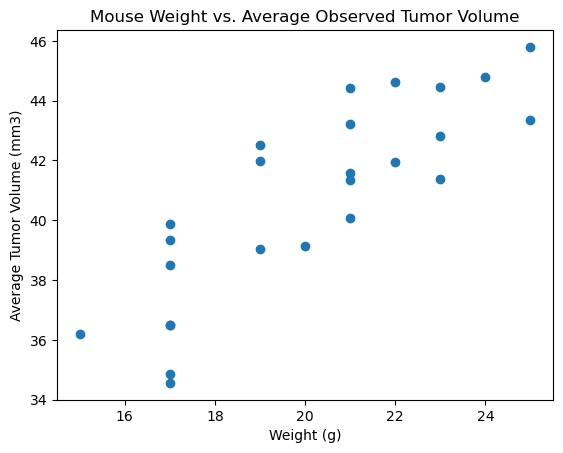

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Calculate the average observed tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()
mouse_weight = capomulin_data[["Mouse ID", "Weight (g)"]].drop_duplicates()

# Merge the average tumor volume with the mouse weight data
combined_data = pd.merge(avg_tumor_volume, mouse_weight, on="Mouse ID")

# Generate a scatter plot of mouse weight vs the average observed tumor volume
plt.scatter(combined_data["Weight (g)"], combined_data["Tumor Volume (mm3)"])
plt.title("Mouse Weight vs. Average Observed Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


Correlation and Regression

The correlation coeffcient is:  0.8419363424694722


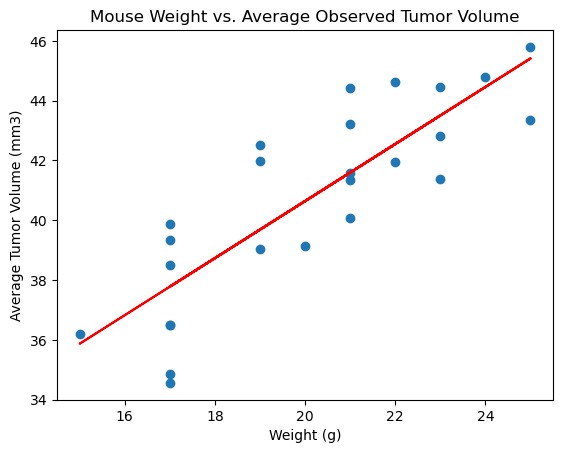

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(combined_data["Weight (g)"], combined_data["Tumor Volume (mm3)"])[0, 1]
print("The correlation coeffcient is: ",correlation_coefficient)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(combined_data["Weight (g)"], combined_data["Tumor Volume (mm3)"])

# Generate the linear regression line
regression_line = slope * combined_data["Weight (g)"] + intercept

# Generate a scatter plot of mouse weight vs the average observed tumor volume with regression line
plt.scatter(combined_data["Weight (g)"], combined_data["Tumor Volume (mm3)"])
plt.plot(combined_data["Weight (g)"], regression_line, label="Linear regression line", color='r')
plt.title("Mouse Weight vs. Average Observed Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
